# Titanic Data Science Project

---

## 1. Preparation

### 1.1 Import Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

#Scipy.stats
from scipy.stats import probplot, skew
from scipy.stats import pointbiserialr
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import kruskal

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# sklearn models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### 1.2 Load DataSet

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 2. Data Cleanse & Statistical Analysis

In [5]:
#1. Check the NULL

train_df.info()
print("-"*30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [6]:
train_null = train_df.drop(['Survived'], axis=1).isnull().sum().sort_values(ascending=False)
train_null = pd.concat([train_null, round(train_null/len(train_df) * 100, 2)], 
                        axis=1, keys=['Train', '%'])

test_null = test_df.isnull().sum().sort_values(ascending=False)
test_null = pd.concat([test_null, round(test_null/len(test_df) * 100, 2)], 
                        axis=1, keys=['Test', '%'])

pd.concat([train_null, test_null], axis=1)

,Train,%,Test,%
Cabin,687,77.10,327,78.23
Age,177,19.87,86,20.57
Embarked,2,0.22,0,0.00
PassengerId,0,0.00,0,0.00
Pclass,0,0.00,0,0.00
Name,0,0.00,0,0.00
Sex,0,0.00,0,0.00
SibSp,0,0.00,0,0.00
Parch,0,0.00,0,0.00
Ticket,0,0.00,0,0.00


### 2.1 Cabin

In [7]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

### 2.2 Age

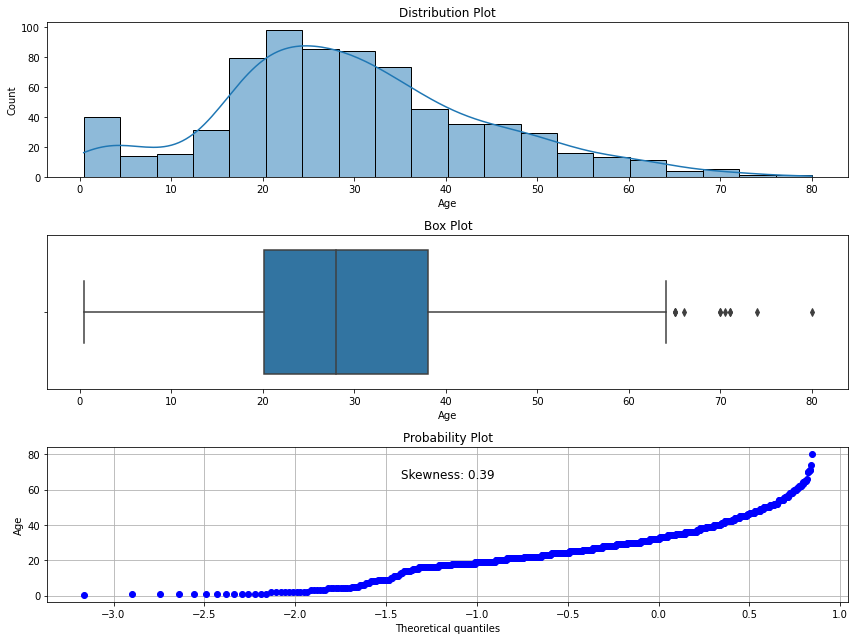

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

#1. Distribution Plot
sns.histplot(train_df["Age"], kde=True, ax=axes[0])
axes[0].set_title("Distribution Plot")

# 2. Box Plot
sns.boxplot(x=train_df["Age"], ax=axes[1])
axes[1].set_title("Box Plot")

# 3.Probability Plot with Skewness
probplot(train_df["Age"], plot=axes[2], fit=True)
axes[2].set_title("Probability Plot")
axes[2].set_ylabel('Age')
axes[2].grid()

# Display Skewness
skewness = skew(train_df["Age"].dropna())
axes[2].text(0.5, 0.8, f'Skewness: {skewness:.2f}', transform=axes[2].transAxes, fontsize=12, ha='center')

plt.tight_layout()

plt.show()

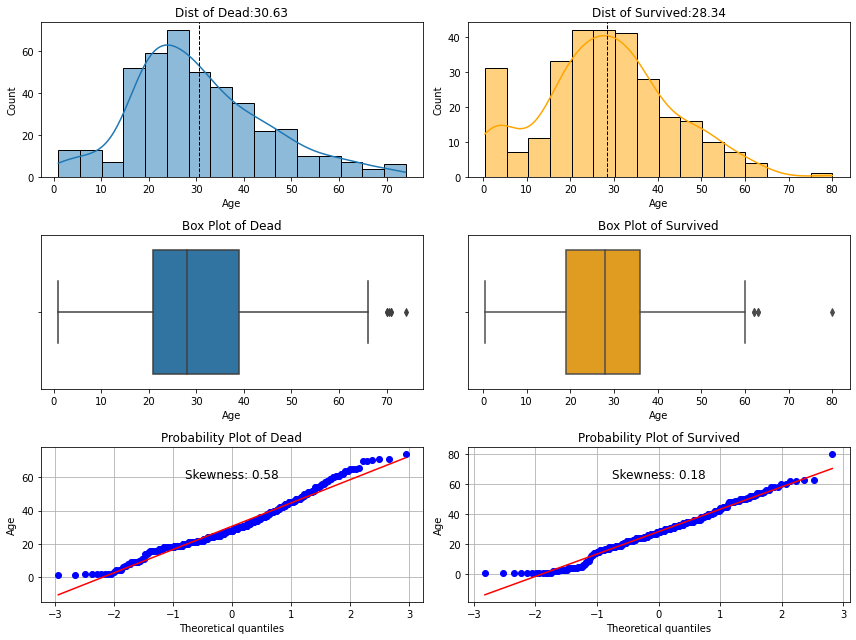

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

age_dead = train_df.loc[train_df['Survived'] == 0, 'Age'].dropna()
age_survived = train_df.loc[train_df['Survived'] == 1, 'Age'].dropna()

#1. Distribution Plot
sns.histplot(age_dead, kde=True, ax=axes[0][0])
axes[0][0].axvline(age_dead.mean(),linestyle='dashed', color='black', linewidth=1)
axes[0][0].set_title("Dist of Dead:" f'{age_dead.mean():.2f}')

sns.histplot(age_survived, kde=True, color='orange', ax=axes[0][1])
axes[0][1].axvline(age_survived.mean(), linestyle='dashed', color='black', linewidth=1)
axes[0][1].set_title("Dist of Survived:" f'{age_survived.mean():.2f}')

# 2. Box Plot
sns.boxplot(x=age_dead, ax=axes[1][0])
axes[1][0].set_title("Box Plot of Dead")

sns.boxplot(x=age_survived, color='orange', ax=axes[1][1])
axes[1][1].set_title("Box Plot of Survived")

# 3.Probability Plot with Skewness
probplot(age_dead, plot=axes[2][0], fit=True)
axes[2][0].set_title("Probability Plot of Dead")
axes[2][0].set_ylabel('Age')
axes[2][0].grid()

skew_dead = skew(age_dead)
axes[2][0].text(0.5, 0.8, f'Skewness: {skew_dead:.2f}', transform=axes[2][0].transAxes, fontsize=12, ha='center')

probplot(age_survived, plot=axes[2][1], fit=True)
axes[2][1].set_title("Probability Plot of Survived")
axes[2][1].set_ylabel('Age')
axes[2][1].grid()

skew_survived = skew(age_survived)
axes[2][1].text(0.5, 0.8, f'Skewness: {skew_survived:.2f}', transform=axes[2][1].transAxes, fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In [10]:
# Don't need to do this
l_stat, p_levene = levene(age_dead, age_survived)

print("----- Levene's Test Results -----")
print(f"L-Statistic: {l_stat:.4f}")
print(f"P-Value: {p_levene:.4f}")

if p_levene > 0.05:
    print("The variances are not significantly different.")
else:
    print("The variances are significantly different.")

----- Levene's Test Results -----
L-Statistic: 1.1954
P-Value: 0.2746
The variances are not significantly different.


In [11]:
# Don't need to do this
t_stat, p_ttest = ttest_ind(age_dead, age_survived, equal_var=True)

print("----- T Test Results -----")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_ttest:.4f}")

if p_ttest < 0.05:
    print("The difference in average ages is statistically significant.")
else:
    print("There is no significant difference in average ages.")

----- T Test Results -----
T-Statistic: 2.0667
P-Value: 0.0391
The difference in average ages is statistically significant.


### 2.3 Embarked

In [12]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


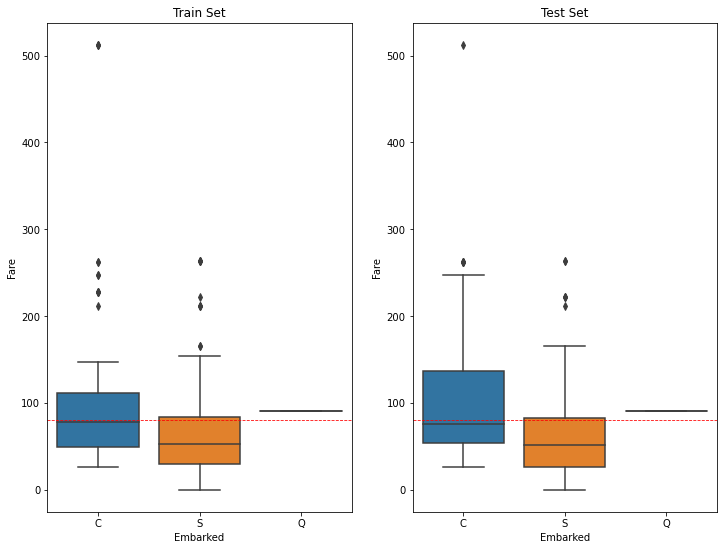

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 9))

order = ['C', 'S', 'Q']

sns.boxplot(x='Embarked', y='Fare', data=train_df.loc[train_df['Pclass']==1], order=order, ax=axes[0])
axes[0].axhline(80.0, linestyle='dashed', color='red', linewidth=0.8)
axes[0].set_title("Train Set")

sns.boxplot(x='Embarked', y='Fare', data=test_df.loc[test_df['Pclass']==1], order=order, ax=axes[1])
axes[1].axhline(80.0, linestyle='dashed', color='red', linewidth=0.8)
axes[1].set_title("Test Set")

plt.show()

In [14]:
train_df['Embarked'].fillna("C", inplace=True)

### 2.4 Fare

In [15]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [16]:
missing_value = test_df[(test_df.Pclass == 3) & 
                     (test_df.Embarked == "S") & 
                     (test_df.Sex == "male")].Fare.mean()
test_df.Fare.fillna(round(missing_value, 4), inplace=True)

### 2.5 Results

In [17]:
train_null = train_df.drop(['Survived'], axis=1).isnull().sum().sort_values(ascending=False)
train_null = pd.concat([train_null, round(train_null/len(train_df) * 100, 2)], 
                        axis=1, keys=['Train', '%'])

test_null = test_df.isnull().sum().sort_values(ascending=False)
test_null = pd.concat([test_null, round(test_null/len(test_df) * 100, 2)], 
                        axis=1, keys=['Test', '%'])

pd.concat([train_null, test_null], axis=1)

,Train,%,Test,%
Age,177,19.87,86,20.57
PassengerId,0,0.00,0,0.00
Pclass,0,0.00,0,0.00
Name,0,0.00,0,0.00
Sex,0,0.00,0,0.00
SibSp,0,0.00,0,0.00
Parch,0,0.00,0,0.00
Ticket,0,0.00,0,0.00
Fare,0,0.00,0,0.00
Embarked,0,0.00,0,0.00


## 3. Feature Analysis

In [18]:
combined_df = pd.concat([train_df, test_df], ignore_index = True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


### 3.1 Family Size and Grouping the Family Size

In [19]:
combined_df["FamilySize"] = combined_df["SibSp"] + combined_df["Parch"]

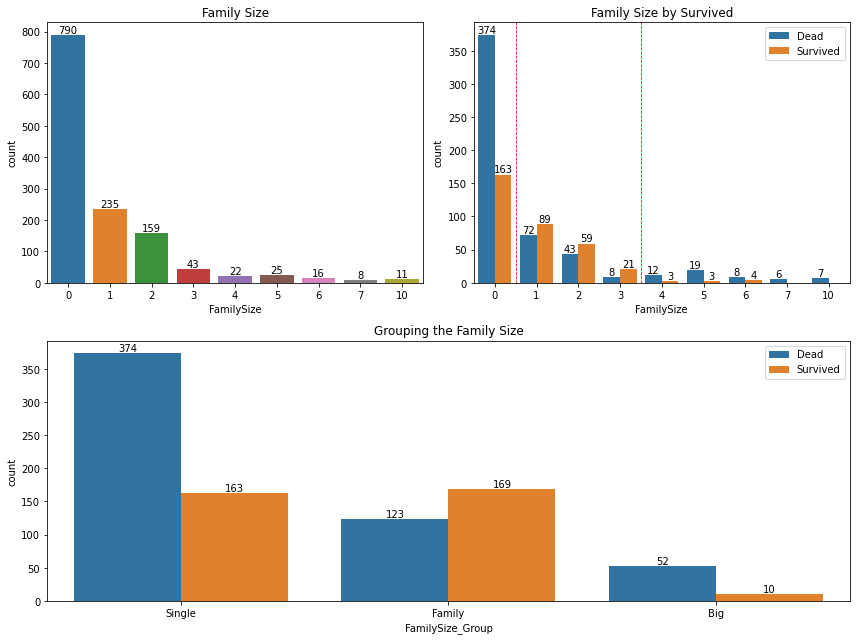

In [20]:
fig = plt.figure(tight_layout=True, figsize=(12, 9))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[0, 0])
sns.countplot(data=combined_df, x='FamilySize', ax=ax0)
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax0.set_title("Family Size")

ax1 = plt.subplot(gs[0, 1])
sns.countplot(x='FamilySize', hue='Survived', data=combined_df, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax1.set_title("Family Size by Survived")
ax1.legend(['Dead', 'Survived'], loc='upper right')

for i in [0, 3]:
    ax1.axvline(i + 0.5, linestyle='dashed', color='red', linewidth=0.8)

combined_df['FamilySize_Group'] = combined_df['FamilySize'].apply(lambda x: 'Single' if x == 0 else ('Family' if x <= 3 else 'Big'))

ax2 = plt.subplot(gs[1, :])
sns.countplot(x='FamilySize_Group', hue='Survived', data=combined_df, order=['Single', 'Family', 'Big'], ax=ax2)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax2.set_title("Grouping the Family Size")
ax2.legend(['Dead', 'Survived'], loc='upper right')

plt.tight_layout()
plt.show()

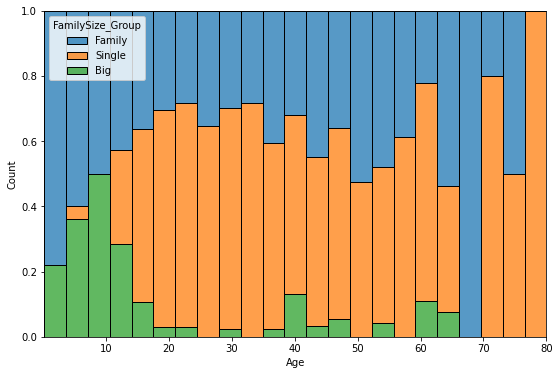

In [21]:
plt.figure(figsize=(9,6))
sns.histplot(data=combined_df, x='Age', hue='FamilySize_Group', multiple='fill')
plt.show()

In [22]:
combined_df[(combined_df["FamilySize_Group"]=='Single') & (combined_df["Age"] < 10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FamilySize_Group
777,778,1.0,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,S,0,Single


In [23]:
combined_df.loc[combined_df['PassengerId'] == 778, 'Age'] = np.nan
combined_df.loc[combined_df['PassengerId'] == 778]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FamilySize_Group
777,778,1.0,3,"Emanuel, Miss. Virginia Ethel",female,NaN,0,0,364516,12.475,S,0,Single


### 3.2 Name to Title and Grouping the Title

In [24]:
def title_group(title):
    womens = ['Miss', 'Ms', 'Mrs']
    mens = ['Mr']
    
    if title in womens:
        return 'Miss/Ms/Mrs'
    elif title in mens:
        return 'Mr'
    else:
        return 'Others'

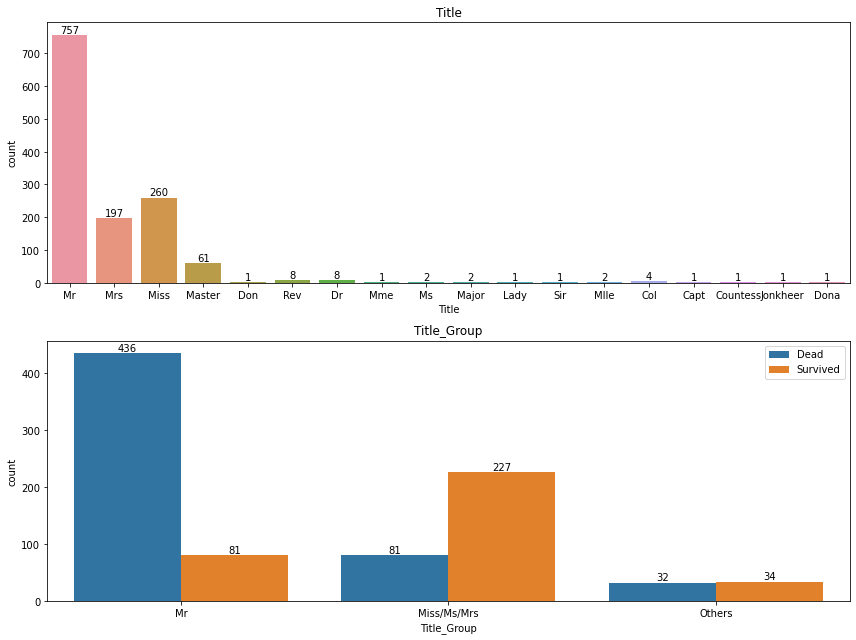

In [25]:
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

combined_df['Title_Group'] = combined_df['Title'].apply(title_group)

fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.countplot(data=combined_df, x='Title', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[0].set_title("Title")

sns.countplot(data=combined_df, x='Title_Group', hue='Survived', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].set_title("Title_Group")
axes[1].legend(["Dead", "Survived"])

plt.tight_layout()
plt.show()

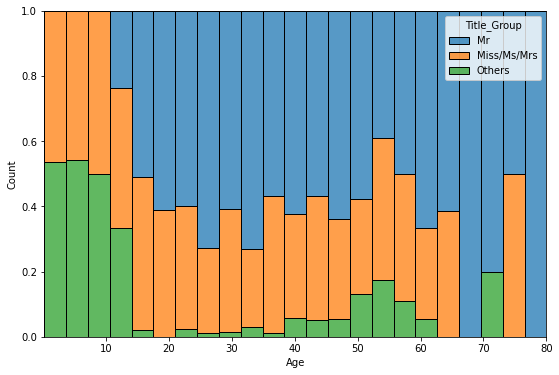

In [26]:
plt.figure(figsize=(9,6))
sns.histplot(data=combined_df, x='Age', hue='Title_Group', multiple='fill')
plt.show()

### 3.3 Fare

In [27]:
print(pd.qcut(combined_df["Fare"], 7))

0         (-0.001, 7.75]
1        (59.4, 512.329]
2           (7.75, 8.05]
3         (27.793, 59.4]
4           (7.75, 8.05]
              ...       
1304        (7.75, 8.05]
1305     (59.4, 512.329]
1306      (-0.001, 7.75]
1307        (7.75, 8.05]
1308    (19.258, 27.793]
Name: Fare, Length: 1309, dtype: category
Categories (7, interval[float64, right]): [(-0.001, 7.75] < (7.75, 8.05] < (8.05, 12.816] < (12.816, 19.258] < (19.258, 27.793] < (27.793, 59.4] < (59.4, 512.329]]


In [28]:
fare_labels = ["Very Low", 
               "Low", 
               "Moderate Low", 
               "Moderate", 
               "Moderate High", 
               "High", 
               "Very High"]
combined_df["Fare_Group"] = pd.qcut(combined_df["Fare"], 7, labels=fare_labels)

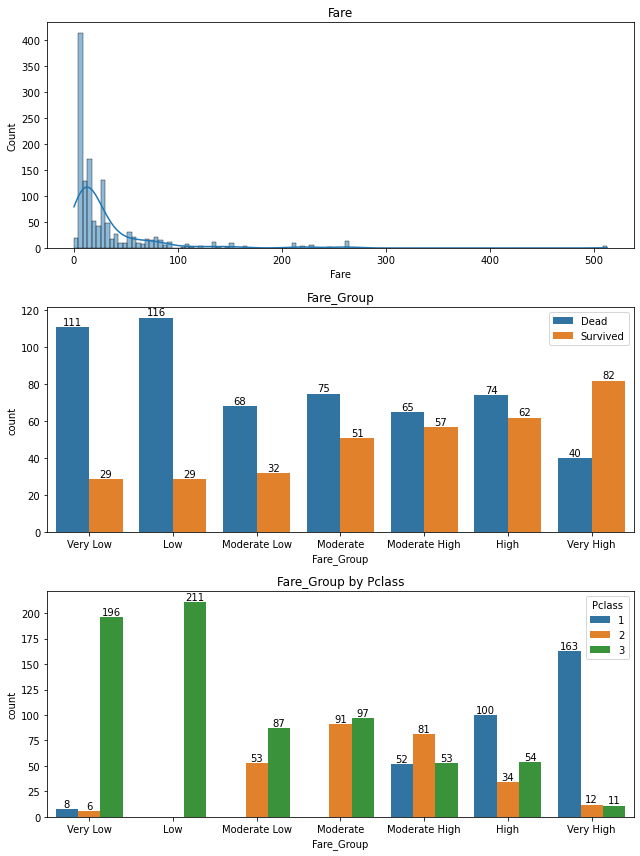

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(9, 12))

sns.histplot(data=combined_df, x='Fare', ax=axes[0], kde=True)
axes[0].set_title("Fare")

sns.countplot(data=combined_df, x='Fare_Group', hue='Survived', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].set_title("Fare_Group")
axes[1].legend(["Dead", "Survived"])

sns.countplot(data=combined_df, x='Fare_Group', hue='Pclass', ax=axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[2].set_title("Fare_Group by Pclass")

plt.tight_layout()
plt.show()

In [30]:
combined_df['Pclass'] = combined_df['Pclass'].astype('category')
train_df = combined_df.loc[:len(train_df)-1, :]
test_df = combined_df.loc[len(train_df):, :].drop(["Survived"], axis=1)

## 4. KNN Imputer for Age Column

| Column Name        | Non-null Count |Type       |
|--------------------|----------------|-----------|
| PassengerId        | 1309           |  X        |
| Pclass             | 1309           |Categorical|
| Name               | 1309           |  X        |
| Sex                | 1309           |Categorical|
| Age                | **1045**           |Numerical  |
| SibSp              | 1309           |Numerical  |
| Parch              | 1309           |Numerical  |
| Ticket             | 1309           |  X        |
| Fare               | 1309           |  X        |
| Embarked           | 1309           |Categorical|
| FamilySize         | 1309           |  X        |
| FamilySize_Group   | 1309           |Categorical|
| Title              | 1309           |  X        |
| Title_Group        | 1309           |Categorical|
| Fare_Group         | 1309           |Categorical|

### 4.1 Heatmaps

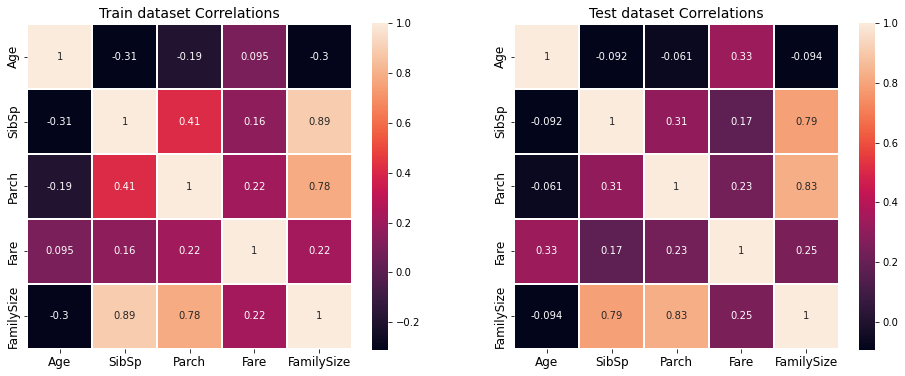

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(train_df.drop(['PassengerId', 'Survived'], axis=1).corr(), 
            ax=axes[0], annot=True, square=True, linewidth=.2)
axes[0].set_title("Train dataset Correlations", size=14)

sns.heatmap(test_df.drop(['PassengerId'], axis=1).corr(), 
            ax=axes[1], annot=True, square=True, linewidth=.2)
axes[1].set_title("Test dataset Correlations", size=14)

for i in range(2):    
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.show()

### 4.2 Age and Sex (Point Biserial Correlation)

In [32]:
combined_df = pd.concat([train_df, test_df], ignore_index = True)
combined_df = combined_df.drop(['Survived'], axis=1)
combined_df['IsAgeNull'] = combined_df['Age'].isnull()

combined_df[["Sex", "Age"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     1309 non-null   object 
 1   Age     1045 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.6+ KB


In [33]:
point_biserial_df = combined_df[~combined_df["Age"].isnull() & ~combined_df["Sex"].isnull()]

# Extract 'Sex' column and create dummy variable
sex_column = point_biserial_df["Sex"]
sex_dummies = pd.get_dummies(sex_column, drop_first=True)
sex_dummies.columns = ["Sex_Cat"]

# Perform point-biserial correlation
pbr_stat, p_pbr = pointbiserialr(point_biserial_df["Age"], sex_dummies)

# Print the results
print(f"Point Biserial Result: {pbr_stat[0]:.4f}")
print(f"Point p_value: {p_pbr:.4f}")

# point-biserial correlation test
alpha = 0.05  # Significance level

# Decision based on the p-value
if p_pbr <= alpha:
    print("\nReject Null Hypothesis:")
    print("There is an evidence that the observed correlation is statistically significant.")
else:
    print("\nFail to Reject Null Hypothesis:")
    print("There is no significant evidence of a correlation.")

    
# Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html

Point Biserial Result: 0.0616
Point p_value: 0.0464

Reject Null Hypothesis:
There is an evidence that the observed correlation is statistically significant.


### 4.3 Age with Non-Binary Categorical Data (From ANOVA to Kruskal-Wallis)

For conducting ANOVA, we need to meet three conditions:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. homoscedasticity.

You can refer the details on here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

---

**1. Independence**

The assumption of independence is typically satisfied if the data points are collected independently.

**2. Normarlity**

The assumption of normality is about the distribution of the residuals (the differences between observed values and the group means). You can use the Shapiro-Wilk test for normality.

In [34]:
non_binary_cate_col = ["Pclass", "Embarked", "FamilySize_Group", "Title_Group", "Fare_Group"]

combined_df[non_binary_cate_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            1309 non-null   category
 1   Embarked          1309 non-null   object  
 2   FamilySize_Group  1309 non-null   object  
 3   Title_Group       1309 non-null   object  
 4   Fare_Group        1309 non-null   category
dtypes: category(2), object(3)
memory usage: 33.8+ KB


In [35]:
anova_df = combined_df[~combined_df["Age"].isnull()]
anova_df["Embarked"].value_counts()

S    781
C    214
Q     50
Name: Embarked, dtype: int64

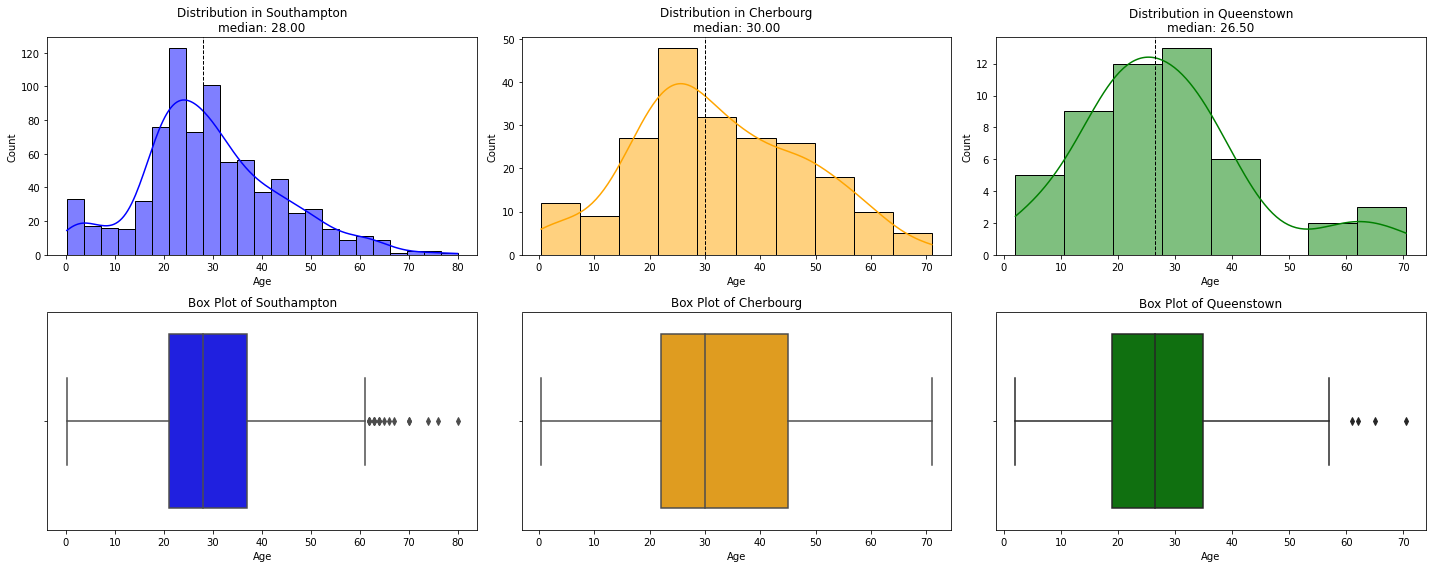

In [36]:
embarked_categories = anova_df['Embarked'].unique()
cities = ["Southampton", "Cherbourg", "Queenstown"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(2, len(embarked_categories), figsize=(20, 8))

for i, category in enumerate(embarked_categories):
    age_group = anova_df['Age'][anova_df['Embarked'] == category]
    
    # 1. Hist plot
    sns.histplot(age_group, kde=True, ax=axes[0][i], color=colors[i])
    axes[0][i].axvline(age_group.median(), linestyle='dashed', color='black', linewidth=1)
    axes[0][i].set_title(f"Distribution in {cities[i]}\nmedian: {age_group.median():.2f}", size=12)
    
    # 2. Box Plot
    sns.boxplot(x=age_group, ax=axes[1][i], color=colors[i])
    axes[1][i].set_title(f"Box Plot of {cities[i]}", size=12)

plt.tight_layout()
plt.show()

In [37]:
alpha = 0.05  # Significance level

print("**Shapiro-Wilk Test Results**\n")

# Shapiro-Wilk test
for category in embarked_categories:
    group_data = anova_df['Age'][anova_df['Embarked'] == category]
    _, p_shapiro = shapiro(group_data)
    print(f"Shapiro-Wilk p-value for {category}: {p_shapiro:.4f}")
    
    if p_shapiro < alpha:
        print(f"Reject Null Hypothesis for {category}: The data is not normally distributed.\n")
    else:
        print(f"Fail to Reject Null Hypothesis for {category}: The data is reasonably normally distributed.\n")
        
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

**Shapiro-Wilk Test Results**

Shapiro-Wilk p-value for S: 0.0000
Reject Null Hypothesis for S: The data is not normally distributed.

Shapiro-Wilk p-value for C: 0.0260
Reject Null Hypothesis for C: The data is not normally distributed.

Shapiro-Wilk p-value for Q: 0.0050
Reject Null Hypothesis for Q: The data is not normally distributed.



I will use Non Paramatic test instead of ANOVA.

In [38]:
alpha = 0.05  # Significance level

kru_stats, p_kru = kruskal(
    anova_df['Age'][anova_df['Embarked'] == 'S'],
    anova_df['Age'][anova_df['Embarked'] == 'C'],
    anova_df['Age'][anova_df['Embarked'] == 'Q']
)

print("**Kruskal-Wallis Test Result**\n")
print(f"Kruskal-Wallis Stats: {kru_stats:.4f}")
print(f"Kruskal-Wallis p-value: {p_kru:.4f}")

if p_kru <= alpha:
    print("Reject Null Hypothesis: There are significant differences between at least two groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant differences between groups.")

# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

**Kruskal-Wallis Test Result**

Kruskal-Wallis Stats: 8.3789
Kruskal-Wallis p-value: 0.0152
Reject Null Hypothesis: There are significant differences between at least two groups.


### 4.4 Others

In [39]:
alpha = 0.05  # Significance level

Sharpiro_results = []

# Shapiro-Wilk test
for i in range(len(non_binary_cate_col)):
    categories = anova_df[non_binary_cate_col[i]].unique()
    for category in categories:
        group_data = anova_df['Age'][anova_df[non_binary_cate_col[i]] == category]
        _, p_shapiro = shapiro(group_data)

        distribution = "Not Normally Distributed" if p_shapiro < alpha else "Normally Distributed"
        
        Sharpiro_results.append({
            "Variable": non_binary_cate_col[i],
            "Category": category,
            "p-value": round(p_shapiro, 4),
            "Distribution": distribution
        })

shapiro_results_df = pd.DataFrame(Sharpiro_results)
shapiro_results_df
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

,Variable,Category,p-value,Distribution
0,Pclass,3,0.0000,Not Normally Distributed
1,Pclass,1,0.1403,Normally Distributed
2,Pclass,2,0.0002,Not Normally Distributed
3,Embarked,S,0.0000,Not Normally Distributed
4,Embarked,C,0.0260,Not Normally Distributed
5,Embarked,Q,0.0050,Not Normally Distributed
6,FamilySize_Group,Family,0.0001,Not Normally Distributed
7,FamilySize_Group,Single,0.0000,Not Normally Distributed
8,FamilySize_Group,Big,0.0000,Not Normally Distributed
9,Title_Group,Mr,0.0000,Not Normally Distributed


In [40]:
alpha = 0.05  # Significance level
kru_results = []

for col in non_binary_cate_col:
    categories = anova_df[col].unique()
    
    series_list = []
    
    # Perform Kruskal-Wallis test for each category within the column
    for category in categories:
        series = anova_df['Age'][anova_df[col] == category]
        series_list.append(series)

    _, p_kru = kruskal(*series_list)

    distribution = "There are significant differences" if p_kru < alpha else "No differences"

    kru_results.append({
        "Variable": col,
        "Category": categories,
        "p-value": round(p_kru, 4),
        "Distribution": distribution
    })

kru_results_df = pd.DataFrame(kru_results)

kru_results_df

,Variable,Category,p-value,Distribution
0,Pclass,"[3, 1, 2] Categories (3, int64): [1, 2, 3]",0.0000,There are significant differences
1,Embarked,"[S, C, Q]",0.0152,There are significant differences
2,FamilySize_Group,"[Family, Single, Big]",0.0000,There are significant differences
3,Title_Group,"[Mr, Miss/Ms/Mrs, Others]",0.0000,There are significant differences
4,Fare_Group,"['Very Low', 'Very High', 'Low', 'High', 'Mode...",0.0000,There are significant differences


### 4.5 One-Hot Encoding

In [41]:
cate_col = ["Pclass", "Sex", "Embarked", "FamilySize_Group", "Title_Group", "Fare_Group"]

combined_df[cate_col].head()

,Pclass,Sex,Embarked,FamilySize_Group,Title_Group,Fare_Group
0,3,male,S,Family,Mr,Very Low
1,1,female,C,Family,Miss/Ms/Mrs,Very High
2,3,female,S,Single,Miss/Ms/Mrs,Low
3,1,female,S,Family,Miss/Ms/Mrs,High
4,3,male,S,Single,Mr,Low


In [42]:
target_dummies = pd.get_dummies(combined_df[cate_col], drop_first=True)
target_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize_Group_Family,FamilySize_Group_Single,Title_Group_Mr,Title_Group_Others,Fare_Group_Low,Fare_Group_Moderate Low,Fare_Group_Moderate,Fare_Group_Moderate High,Fare_Group_High,Fare_Group_Very High
0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0
1305,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1306,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0
1307,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0


### 4.6 Standardization

In [43]:
nume_col = ["Age"]

scaler = StandardScaler()
combined_df[nume_col] = scaler.fit_transform(combined_df[nume_col])

combined_df[nume_col].head()

,Age
0,-0.549225
1,0.562433
2,-0.271311
3,0.353997
4,0.353997


In [44]:
knn_df = pd.concat([combined_df[nume_col], target_dummies], axis=1)
knn_df.head()

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize_Group_Family,FamilySize_Group_Single,Title_Group_Mr,Title_Group_Others,Fare_Group_Low,Fare_Group_Moderate Low,Fare_Group_Moderate,Fare_Group_Moderate High,Fare_Group_High,Fare_Group_Very High
0,-0.549225,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0
1,0.562433,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,-0.271311,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
3,0.353997,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0.353997,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0


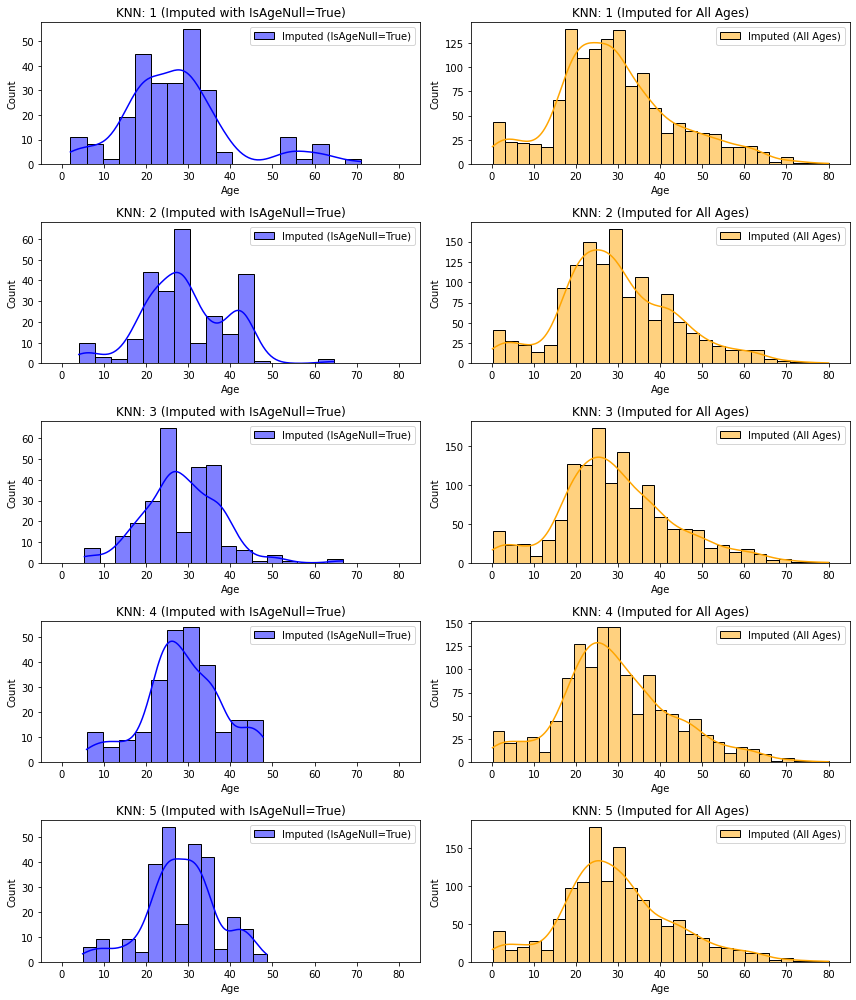

In [45]:
fig, axes = plt.subplots(5, 2, figsize=(12, 14))


for i, (ax1, ax2) in zip(range(1, 6), axes):
    imputer = KNNImputer(n_neighbors=i)
    knn_df_imputed = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)
    knn_df_imputed[nume_col] = scaler.inverse_transform(knn_df_imputed[nume_col])

    sns.histplot(knn_df_imputed["Age"][combined_df["IsAgeNull"]==True], kde=True, ax=ax1, color='blue', label='Imputed (IsAgeNull=True)')
    sns.histplot(knn_df_imputed["Age"], ax=ax2, color='orange', kde=True, label='Imputed (All Ages)')

    ax1.set_title(f"KNN: {i} (Imputed with IsAgeNull=True)", size=12)
    ax2.set_title(f"KNN: {i} (Imputed for All Ages)", size=12)
    
    ax1.set_xlim([-5, 85])
    ax2.set_xlim([-5, 85])
    
    ax1.legend()
    ax2.legend()
    

plt.tight_layout()
plt.show()


In [46]:
imputer = KNNImputer(n_neighbors=3)
knn_df_imputed = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)
knn_df_imputed[nume_col] = scaler.inverse_transform(knn_df_imputed[nume_col])

In [47]:
knn_df_imputed.head()

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize_Group_Family,FamilySize_Group_Single,Title_Group_Mr,Title_Group_Others,Fare_Group_Low,Fare_Group_Moderate Low,Fare_Group_Moderate,Fare_Group_Moderate High,Fare_Group_High,Fare_Group_Very High
0,22.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,35.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 4.7 Result

In [48]:
train_df['Age'] = knn_df_imputed.loc[:len(train_df)-1, 'Age'].values
test_df['Age'] = knn_df_imputed.loc[len(train_df):, 'Age'].values

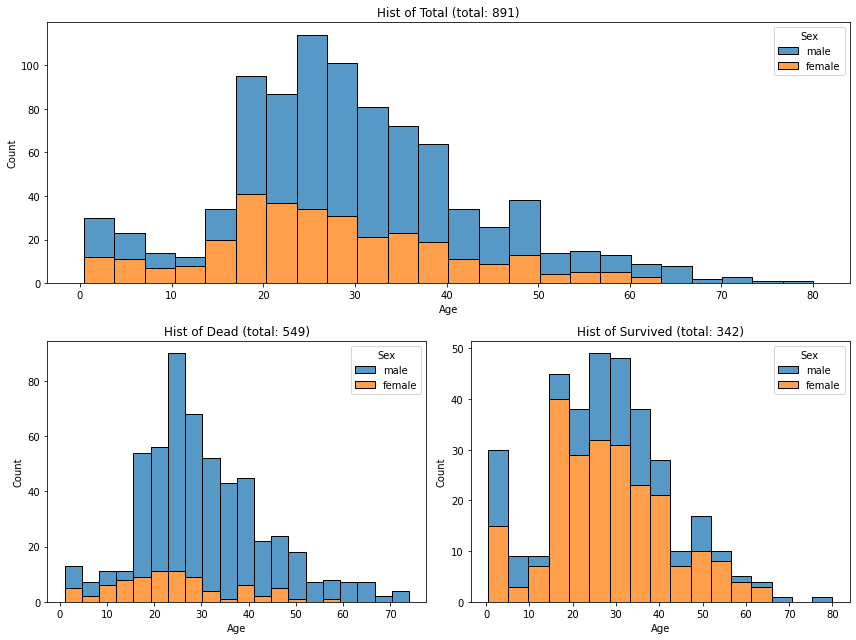

In [49]:
fig = plt.figure(tight_layout=True, figsize=(12, 9))
gs = gridspec.GridSpec(2, 2)

sex_order = ['male', 'female']

age_dead = train_df.loc[train_df['Survived'] == 0, ['Age', 'Sex']]
age_survived = train_df.loc[train_df['Survived'] == 1, ['Age', 'Sex']]

# First: Histogram for all
ax0 = plt.subplot(gs[0, :])
ax0_label = [f'{label} ({(train_df["Sex"]==label).sum()/train_df["Sex"].count():.2%})' for label in sex_order]
sns.histplot(data=train_df.dropna(), x='Age', hue='Sex', 
             multiple='stack', hue_order=sex_order, ax=ax0)
ax0.set_title(f"Hist of Total (total: {int(train_df['Age'].count())})")

# Second: Histogram for Dead
ax1 = plt.subplot(gs[1, 0])
sns.histplot(data=age_dead, x='Age', hue='Sex',
             multiple='stack', hue_order=sex_order, ax=ax1)
ax1.set_title(f"Hist of Dead (total: {int(age_dead['Age'].count())})")

# Third: Histogram for Survived
ax2 = plt.subplot(gs[1, 1])
sns.histplot(data=age_survived, x='Age', hue='Sex',
             multiple='stack', hue_order=sex_order, ax=ax2)
ax2.set_title(f"Hist of Survived (total: {int(age_survived['Age'].count())})")

plt.show()

In [50]:
train_null = train_df.drop(['Survived'], axis=1).isnull().sum().sort_values(ascending=False)
train_null = pd.concat([train_null, round(train_null/len(train_df) * 100, 2)], 
                        axis=1, keys=['Train', '%'])

test_null = test_df.isnull().sum().sort_values(ascending=False)
test_null = pd.concat([test_null, round(test_null/len(test_df) * 100, 2)], 
                        axis=1, keys=['Test', '%'])

pd.concat([train_null, test_null], axis=1)

,Train,%,Test,%
PassengerId,0,0.0,0,0.0
Pclass,0,0.0,0,0.0
Name,0,0.0,0,0.0
Sex,0,0.0,0,0.0
Age,0,0.0,0,0.0
SibSp,0,0.0,0,0.0
Parch,0,0.0,0,0.0
Ticket,0,0.0,0,0.0
Fare,0,0.0,0,0.0
Embarked,0,0.0,0,0.0


In [51]:
train_df.loc[train_df['PassengerId'] == 778]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FamilySize_Group,Title,Title_Group,Fare_Group
777,778,1.0,3,"Emanuel, Miss. Virginia Ethel",female,34.333333,0,0,364516,12.475,S,0,Single,Miss,Miss/Ms/Mrs,Moderate Low


In [52]:
cols = ["Pclass", "Sex", "Age", "Embarked", "FamilySize_Group", "Title_Group", "Fare_Group"]

train_df[cols].head(10)

,Pclass,Sex,Age,Embarked,FamilySize_Group,Title_Group,Fare_Group
0,3,male,22.000000,S,Family,Mr,Very Low
1,1,female,38.000000,C,Family,Miss/Ms/Mrs,Very High
2,3,female,26.000000,S,Single,Miss/Ms/Mrs,Low
3,1,female,35.000000,S,Family,Miss/Ms/Mrs,High
4,3,male,35.000000,S,Single,Mr,Low
5,3,male,37.666667,Q,Single,Mr,Moderate Low
6,1,male,54.000000,S,Single,Mr,High
7,3,male,2.000000,S,Big,Others,Moderate High
8,3,female,27.000000,S,Family,Miss/Ms/Mrs,Moderate Low
9,2,female,14.000000,C,Family,Miss/Ms/Mrs,High


## 5. Supervised Learning

### 5.1 Preprocessing

In [53]:
#Label Encoding
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

# Categorical -> One-Hot Encode
cate_cols = ["Pclass", 'Sex', 'Embarked',"FamilySize_Group", "Title_Group", "Fare_Group"]
target_dummies = pd.get_dummies(train_df[cate_cols], drop_first=True)

# Numerical -> StandardScaler
scaler = StandardScaler()
nume_cols = ["Age"]
train_df[nume_cols] = scaler.fit_transform(train_df[nume_cols])

X = pd.concat([train_df[nume_cols], target_dummies], axis=1)

### 5.2 Model Comparison

In [54]:
models = []
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))

results = []
names = []

scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.826055 (0.039878)
RF: 0.799051 (0.046345)
KNN: 0.801386 (0.033822)
NB: 0.746467 (0.057053)
SGD: 0.797953 (0.033092)
DT: 0.776667 (0.042702)
LR: 0.817079 (0.026460)


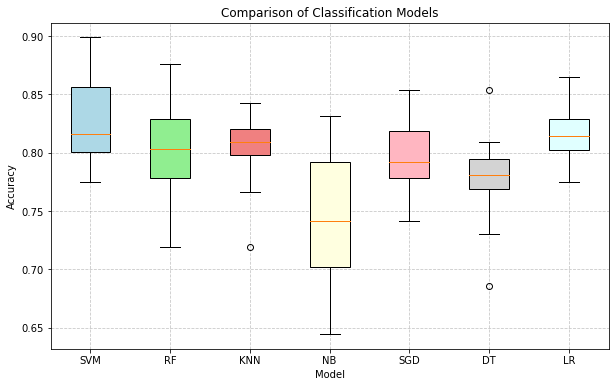

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(results, patch_artist=True)

ax.grid(True, linestyle='--', alpha=0.7)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgrey', 'lightcyan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(names)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Classification Models')

plt.show()


### 5.3 Grid Search CV

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

final_model = grid_search.best_estimator_
test_accuracy = final_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", round(best_accuracy, 4))
print("Test Set Accuracy:", round(test_accuracy, 4))

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8234
Test Set Accuracy: 0.8341


### 5.4 Test

In [57]:
# Categorical -> One-Hot Encode
cate_cols = ["Pclass", 'Sex', 'Embarked',"FamilySize_Group", "Title_Group", "Fare_Group"]
target_dummies = pd.get_dummies(test_df[cate_cols], drop_first=True)

# Numerical -> StandardScaler
scaler = StandardScaler()
nume_cols = ["Age"]
test_df[nume_cols] = scaler.fit_transform(test_df[nume_cols])

final_df = pd.concat([test_df[nume_cols], target_dummies], axis=1)

In [58]:
test_predictions = final_model.predict(final_df)

test_results_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

test_results_df['Survived'] = test_results_df['Survived'].astype(int)
test_results_df.to_csv('test_predictions.csv', index=False)

In [59]:
test_results_df

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
